# Compensation analysis for developers as reported by Stack Overflow

This projects analyses the salery distribution for Germany and the US for the stack overflow developer survey dataset from 2025 and investigates correlated. 

The business question to answer:

* 1.) What are the most correlated factors in Germany and the US?
* 2.) What are the most correlated factors for the top 10% in Germany and US?
* 3.) Are there any differences between Germany and the US?
* 4.) Is job satisfaction correlated with compensation for developers in the mid-range salary bracket?
* 5.) How does years of coding experience and overall work experience relate to compensation in the main dataset? 

In [73]:
import zipfile

zip_file_path = 'data/stack_overflow_data_2025.zip' 

with zipfile.ZipFile(zip_file_path, 'r') as zf:
    zf.extractall(path='data')

In [74]:
import pandas as pd
data = pd.read_csv('data/stackoverflow_survey_2025.csv')

## Data exploration
Investigate features of the dataset. Most features are textual and would need NLP methods to create features, which is out of scope right now.

In [75]:
data.head()

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


In [76]:
data.describe()

,ResponseId,WorkExp,YearsCode,TechEndorse_1,TechEndorse_2,TechEndorse_3,TechEndorse_4,TechEndorse_5,TechEndorse_6,TechEndorse_7,...,SO_Actions_3,SO_Actions_4,SO_Actions_5,SO_Actions_6,SO_Actions_9,SO_Actions_7,SO_Actions_10,SO_Actions_15,ConvertedCompYearly,JobSat
count,49123.000000,42844.000000,43000.000000,35943.000000,35943.000000,35943.000000,35943.000000,35943.000000,35943.000000,35943.000000,...,26241.000000,26241.000000,26241.000000,26241.000000,26241.000000,26241.000000,26241.000000,26241.000000,2.392800e+04,26643.000000
mean,24562.000000,13.370810,16.575256,7.867763,4.104415,4.110341,5.678574,4.119383,5.225830,6.477562,...,5.718456,4.562097,4.791014,5.198925,5.676232,4.984033,7.100149,10.079341,1.017916e+05,7.202042
std,14180.732974,10.801917,11.789269,2.397243,2.276154,2.329539,2.397899,2.437938,2.801354,2.331433,...,2.628090,3.070817,2.643243,2.563386,2.311023,2.490411,2.469361,1.941629,4.619345e+05,1.997234
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,0.000000
25%,12281.500000,5.000000,8.000000,7.000000,2.000000,2.000000,4.000000,2.000000,3.000000,5.000000,...,3.000000,1.000000,3.000000,3.000000,4.000000,3.000000,6.000000,10.000000,3.817100e+04,6.000000
50%,24562.000000,10.000000,14.000000,9.000000,4.000000,4.000000,6.000000,4.000000,5.000000,7.000000,...,6.000000,4.000000,5.000000,5.000000,6.000000,5.000000,8.000000,10.000000,7.538350e+04,8.000000
75%,36842.500000,20.000000,24.000000,9.000000,6.000000,6.000000,8.000000,6.000000,8.000000,8.000000,...,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,9.000000,10.000000,1.206302e+05,8.000000
max,49123.000000,100.000000,100.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,5.000000e+07,10.000000


The following columns might provide interesting features for further analysis

In [77]:
interestings_columns = [
    'MainBranch',
    'Age',
    'EdLevel',
    'Employment',
    'EmploymentAddl',
    'WorkExp',
    'LearnCodeChoose',
    'LearnCode',
    'LearnCodeAI',
    'AILearnHow',
    'YearsCode',
    'DevType',
    'OrgSize',
    'ICorPM',
    'RemoteWork',
    'PurchaseInfluence',
    'AIOpen',
    'NewRole',
    'ToolCountWork',
    'ToolCountPersonal',
    'Country',
    'Industry',
    'Currency',
    'CompTotal',
    'LanguageChoice',
    'ConvertedCompYearly',
    'JobSat'
]

df = data[interestings_columns]


Checking the selected columns for NAN values and unique values. Features must provide numerical values or potential categorical values.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49123 entries, 0 to 49122
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MainBranch           49123 non-null  object 
 1   Age                  49123 non-null  object 
 2   EdLevel              48087 non-null  object 
 3   Employment           48277 non-null  object 
 4   EmploymentAddl       44820 non-null  object 
 5   WorkExp              42844 non-null  float64
 6   LearnCodeChoose      46801 non-null  object 
 7   LearnCode            33516 non-null  object 
 8   LearnCodeAI          45153 non-null  object 
 9   AILearnHow           28224 non-null  object 
 10  YearsCode            43000 non-null  float64
 11  DevType              43636 non-null  object 
 12  OrgSize              34144 non-null  object 
 13  ICorPM               33211 non-null  object 
 14  RemoteWork           33747 non-null  object 
 15  PurchaseInfluence    37402 non-null 

Looking at the "MainBranch" feature shows that the are non professional developers. This will be useful to clear the dataset

In [79]:
# Example for data that provides easy insight and can be hot one encoded
print('MainBranch:')
print(df['MainBranch'].unique())

print('Country:')
print(df['Country'].unique())

print('Compensation:')
print(df['ConvertedCompYearly'].unique())

MainBranch:
['I am a developer by profession'
 'I am not primarily a developer, but I write code sometimes as part of my work/studies'
 'I used to be a developer by profession, but no longer am'
 'I code primarily as a hobby'
 'I work with developers or my work supports developers but am not a developer by profession'
 'I am learning to code']
Country:
['Ukraine' 'Netherlands' 'India' 'Georgia' 'Australia' 'Greece' 'Germany'
 'Bangladesh' 'Brazil' 'United States of America' 'Lithuania'
 'United Kingdom of Great Britain and Northern Ireland' 'Ireland' 'Sweden'
 'Dominican Republic' 'Austria' 'Belgium' 'Czech Republic' 'Italy'
 'Hungary' 'Malaysia' 'Switzerland' 'Egypt' 'Sri Lanka' 'Poland' 'Spain'
 'Russian Federation' 'Serbia' 'Japan' 'France' 'Romania' 'Canada'
 'Uruguay' 'United Arab Emirates' 'Argentina' 'Norway' 'Slovakia'
 'Republic of Moldova' 'Peru' 'Portugal' 'Costa Rica' 'Croatia'
 'Iran, Islamic Republic of...' 'Philippines' 'China' 'Finland' 'Colombia'
 'Ethiopia' 'Israel' '

In [80]:
# Example for data that needs further processing and don't qualify right now
print('AIOpen')
print(df['AIOpen'].unique())

AIOpen
['Troubleshooting, profiling, debugging' 'All skills. AI is a flop.'
 'Understand how things actually work, problem solving, and algorithms'
 ...
 'knowledge of patterns, architecture and understanding of business processes'
 'Understanding underlying infrastructure where the code runs.'
 'الكود المصدر الذي وجب على أساس الذكاء الاصطناعي']


Target variable indicated missing values. This will also be used to clear the dataset

In [81]:
df['ConvertedCompYearly'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 49123 entries, 0 to 49122
Series name: ConvertedCompYearly
Non-Null Count  Dtype  
--------------  -----  
23928 non-null  float64
dtypes: float64(1)
memory usage: 383.9 KB


Finally preparing the Datasets. WARNING: By removing NAN we very likely introduce bias.

In [82]:
def prepare_country_data(df, country_name, columns):
    """Filters DataFrame for professional developers in a specific country and drops NaNs."""
    tmp_df = df.query('MainBranch == "I am a developer by profession"')
    if country_name:
        tmp_df = tmp_df.query(f'Country == "{country_name}"')
    return tmp_df[columns].dropna()

In [83]:
refined_columns = [
                    'Age', 
                    'EdLevel',
                    'Employment',
                    'WorkExp',
                    'YearsCode',
                    'DevType',
                    'OrgSize',
                    'ICorPM',
                    'RemoteWork',
                    'JobSat',
                    'ConvertedCompYearly'
                ]

data_germany = prepare_country_data(df, "Germany", refined_columns)
data_usa = prepare_country_data(df, "United States of America", refined_columns)


In [84]:
data_germany.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1525 entries, 35 to 49000
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1525 non-null   object 
 1   EdLevel              1525 non-null   object 
 2   Employment           1525 non-null   object 
 3   WorkExp              1525 non-null   float64
 4   YearsCode            1525 non-null   float64
 5   DevType              1525 non-null   object 
 6   OrgSize              1525 non-null   object 
 7   ICorPM               1525 non-null   object 
 8   RemoteWork           1525 non-null   object 
 9   JobSat               1525 non-null   float64
 10  ConvertedCompYearly  1525 non-null   float64
dtypes: float64(4), object(7)
memory usage: 143.0+ KB


In [85]:
data_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3818 entries, 22 to 49006
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  3818 non-null   object 
 1   EdLevel              3818 non-null   object 
 2   Employment           3818 non-null   object 
 3   WorkExp              3818 non-null   float64
 4   YearsCode            3818 non-null   float64
 5   DevType              3818 non-null   object 
 6   OrgSize              3818 non-null   object 
 7   ICorPM               3818 non-null   object 
 8   RemoteWork           3818 non-null   object 
 9   JobSat               3818 non-null   float64
 10  ConvertedCompYearly  3818 non-null   float64
dtypes: float64(4), object(7)
memory usage: 357.9+ KB


## Analyze the distribution of the compensation data

Both datasets have some outliers. It might be correct data, but it is not verified. It will be removed for plotting to have better visibility for the majority of the data. It will however be used in the further analysis.

In [86]:
#Define plotting function
import matplotlib.pyplot as plt

def plot_compensation_distribution(df, column_name, n_outlier=0, country_name=""):
    """ Creates a plot for the sorted samples of the compensation data and a histogram
    
    parameters:
        df (DataFrame): dataframe containing the data series to plot
        columns_name (str): column where to find the series to plot
        n_outlier (unsigned int): number of top values (outlier) that should be ignored for plotting

    returns:
        fig_handle: reference to the plot figure
    """
    y_values =  df[column_name].dropna().sort_values(ascending=True)[:-n_outlier]
    x_values = range(len(y_values))

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    ax1.scatter(x_values, y_values, alpha=0.5)
    ax1.set_title(f'Compensation Samples Sorted {country_name}')
    ax1.set_xlabel('Sample Number')
    ax1.ticklabel_format(style='plain')
    ax1.set_ylabel('Compensation [USD]')
    ax2.hist(y_values, bins=200, color='skyblue', edgecolor='black')
    ax2.set_title(f'Histogram Compensation {country_name}')
    ax2.set_xlabel('Compensation [USD]')
    ax2.set_ylabel('Number of Samples')
    ax2.ticklabel_format(style='plain', axis='x')
    


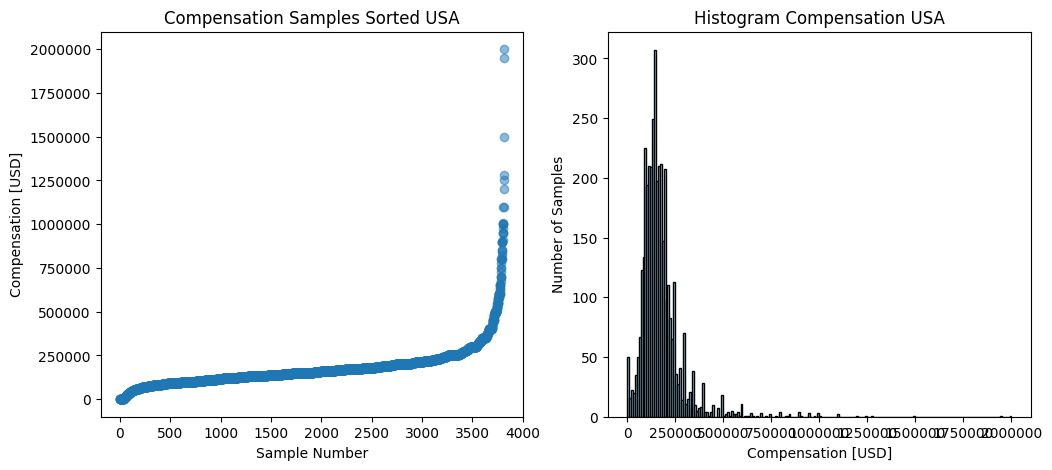

In [87]:
# Plot US data
_ = plot_compensation_distribution(data_usa,\
                                'ConvertedCompYearly',\
                                n_outlier=1,\
                                country_name="USA")

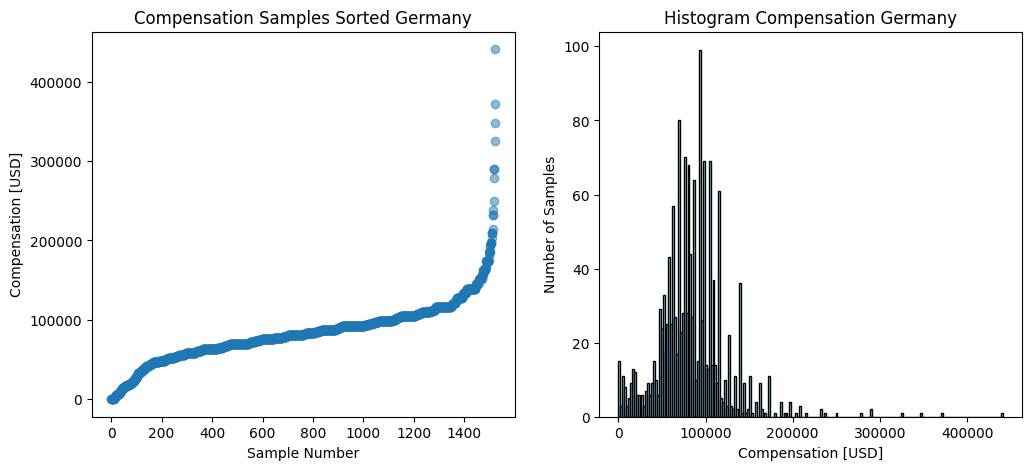

In [88]:
# Plot Germany data
_ = plot_compensation_distribution(data_germany, \
                                   'ConvertedCompYearly', \
                                    n_outlier=1,\
                                    country_name='Germany')

The data shows for both countrys a normal distribution arount the mean with some outliers. The outliers have a slight non-linearity towards low and high compenstations. We will further investigate, with features are correlated with to outlieres of high compenstations.

## Analysis of correlated factors

### Prepare data for coveriance analysis

In [89]:
#TransformData

# Perform one-hot encoding
df_one_hot_ger = pd.get_dummies(data_germany, columns=data_germany.select_dtypes('object').columns)
df_one_hot_usa = pd.get_dummies(data_usa, columns=data_usa.select_dtypes('object').columns)


### Do coverance analysis

In [90]:
def get_n_top_correlated_factors(df, target_variable, n = 1):
    """Perform the correlation calculation for a given target variable and returns top n sorted values in descending order
    
    parameters:
        df (pd.Dataframe): DataFrame with numeric values only
        target_variable (str): specify the columns that you want to know the corrlated factors
        n (int): specific how many of the top elements should be returned
    
    returns:
        DataFrame: Containin one columns with the top n correlated elements
    """

    corr_matrix = df.corr()
    return corr_matrix[target_variable].sort_values(ascending=False)[:n]

    

### Get data chuncks

In [91]:
print(f"Samles USA: {len(data_usa)}")
print(f"Samles Germany: {len(data_germany)}")

Samles USA: 3818
Samles Germany: 1525


Assuming 1% USA is 38 datapoints and 1% for Germany is 15 datapoints. Also dropping the lowest 10%

In [92]:
usa_sorted = df_one_hot_usa.sort_values('ConvertedCompYearly', ascending=False)
germany_sorted = df_one_hot_ger.sort_values('ConvertedCompYearly', ascending=False)

In [93]:

top_1_per_usa = usa_sorted.iloc[0:38]
top_10_per_usa = usa_sorted.iloc[0:380]
mid_80_per_usa = usa_sorted.iloc[380:3450]

In [94]:
top_1_per_ger = germany_sorted.iloc[0:15]
top_10_per_ger = germany_sorted.iloc[0:150]
mid_80_per_ger = germany_sorted.iloc[150:1400]

In [95]:
top_1_per_usa

,WorkExp,YearsCode,JobSat,ConvertedCompYearly,Age_18-24 years old,Age_25-34 years old,Age_35-44 years old,Age_45-54 years old,Age_55-64 years old,Age_65 years or older,...,OrgSize_I don’t know,"OrgSize_Just me - I am a freelancer, sole proprietor, etc.",OrgSize_Less than 20 employees,ICorPM_Individual contributor,ICorPM_People manager,"RemoteWork_Hybrid (some in-person, leans heavy to flexibility)","RemoteWork_Hybrid (some remote, leans heavy to in-person)",RemoteWork_In-person,RemoteWork_Remote,"RemoteWork_Your choice (very flexible, you can come in when you want or just as needed)"
5410,11.0,18.0,8.0,2346000.0,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
34975,15.0,18.0,9.0,2000000.0,False,False,True,False,False,False,...,False,False,True,True,False,False,False,True,False,False
5327,11.0,22.0,10.0,1950000.0,False,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
3265,23.0,30.0,4.0,1500000.0,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
22510,17.0,19.0,7.0,1279775.0,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2725,13.0,17.0,7.0,1250000.0,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2812,19.0,24.0,3.0,1200000.0,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4842,25.0,25.0,10.0,1100000.0,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
31678,22.0,25.0,7.0,1100000.0,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2009,14.0,25.0,8.0,1006403.0,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [96]:
get_n_top_correlated_factors(top_1_per_usa, 'ConvertedCompYearly', n=10)

ConvertedCompYearly                                               1.000000
DevType_Data scientist                                            0.598956
RemoteWork_In-person                                              0.297518
OrgSize_10,000 or more employees                                  0.239370
OrgSize_Less than 20 employees                                    0.218084
ICorPM_Individual contributor                                     0.152217
EdLevel_Some college/university study without earning a degree    0.127813
DevType_Developer, full-stack                                     0.127211
RemoteWork_Hybrid (some remote, leans heavy to in-person)         0.105141
EdLevel_Bachelor’s degree (B.A., B.S., B.Eng., etc.)              0.102546
Name: ConvertedCompYearly, dtype: float64

In [97]:
get_n_top_correlated_factors(top_10_per_usa, 'ConvertedCompYearly', n=10)

ConvertedCompYearly                                       1.000000
Age_35-44 years old                                       0.116665
DevType_Data scientist                                    0.115288
DevType_Founder, technology or otherwise                  0.106233
EdLevel_Professional degree (JD, MD, Ph.D, Ed.D, etc.)    0.080134
Age_18-24 years old                                       0.079722
OrgSize_10,000 or more employees                          0.059649
OrgSize_Less than 20 employees                            0.056980
RemoteWork_In-person                                      0.042952
DevType_Data engineer                                     0.042167
Name: ConvertedCompYearly, dtype: float64

In [98]:
get_n_top_correlated_factors(mid_80_per_usa, 'ConvertedCompYearly', n=10)

ConvertedCompYearly                         1.000000
YearsCode                                   0.226981
WorkExp                                     0.225593
RemoteWork_Remote                           0.159059
Age_35-44 years old                         0.150903
DevType_Engineering manager                 0.131543
DevType_Developer, back-end                 0.112197
ICorPM_People manager                       0.109662
DevType_Architect, software or solutions    0.098440
Age_45-54 years old                         0.082517
Name: ConvertedCompYearly, dtype: float64

In [99]:
get_n_top_correlated_factors(top_1_per_ger, 'ConvertedCompYearly', n=10)

ConvertedCompYearly                                                1.000000
DevType_Senior executive (C-suite, VP, etc.)                       0.418983
EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            0.384974
Age_25-34 years old                                                0.378703
RemoteWork_Remote                                                  0.293332
DevType_Developer, full-stack                                      0.250420
OrgSize_5,000 to 9,999 employees                                   0.211291
Employment_Independent contractor, freelancer, or self-employed    0.201510
ICorPM_Individual contributor                                      0.150644
DevType_Developer, mobile                                          0.128627
Name: ConvertedCompYearly, dtype: float64

In [100]:
get_n_top_correlated_factors(top_10_per_ger, 'ConvertedCompYearly', n=10)

ConvertedCompYearly                                                1.000000
DevType_Senior executive (C-suite, VP, etc.)                       0.375415
Employment_Independent contractor, freelancer, or self-employed    0.246909
OrgSize_5,000 to 9,999 employees                                   0.189006
OrgSize_Less than 20 employees                                     0.175911
Age_25-34 years old                                                0.148002
DevType_Developer, mobile                                          0.134738
RemoteWork_Remote                                                  0.126388
DevType_Developer, full-stack                                      0.099255
EdLevel_Some college/university study without earning a degree     0.096751
Name: ConvertedCompYearly, dtype: float64

In [101]:
get_n_top_correlated_factors(mid_80_per_ger, 'ConvertedCompYearly', n=10)

ConvertedCompYearly                                        1.000000
WorkExp                                                    0.345028
YearsCode                                                  0.333472
OrgSize_10,000 or more employees                           0.217049
Age_35-44 years old                                        0.210497
EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA, etc.)    0.183319
DevType_Architect, software or solutions                   0.167273
ICorPM_People manager                                      0.158738
DevType_Engineering manager                                0.146591
Age_45-54 years old                                        0.122156
Name: ConvertedCompYearly, dtype: float64

## Anwser to Business Questions 1-4

* 1.) What are the most correlated factors in Germany and the US?

The data shows that in the US and Germany the majority and mid 80% of the compensation distribution in both countries work experience and company size are most correlated.

* 2.) What are the most correlated factors for the top 10% in Germany and US?
* 3.) Are there any differences between Germany and the US?

However, there is a very non-liner increase of compensation in the top 10% of the distribution. In Germany, that is correlated to Executive managers and next to independence employments. The top correlated factors of the in the US for those incomes seems to be the technical field of data science and small companies.


* 4.) Is job satisfaction correlated with compensation for developers in the mid-range salary bracket?

Job Satisfaction (JobSat) does not seems to be related to compensation. A quick sanity check bellow shows that it acutally ranks amongst the least correlated features in both countries.

In [102]:
get_n_top_correlated_factors(df_one_hot_usa, 'ConvertedCompYearly', n=22)

ConvertedCompYearly                                        1.000000
OrgSize_10,000 or more employees                           0.198495
YearsCode                                                  0.177730
WorkExp                                                    0.154095
DevType_Developer, back-end                                0.123745
Age_35-44 years old                                        0.118839
EdLevel_Professional degree (JD, MD, Ph.D, Ed.D, etc.)     0.089774
ICorPM_People manager                                      0.085729
Employment_Employed                                        0.085325
DevType_Engineering manager                                0.082838
DevType_Architect, software or solutions                   0.079985
Age_45-54 years old                                        0.067330
DevType_Senior executive (C-suite, VP, etc.)               0.066732
OrgSize_5,000 to 9,999 employees                           0.066202
EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA

In [103]:
get_n_top_correlated_factors(df_one_hot_ger, 'ConvertedCompYearly', n=22)

ConvertedCompYearly                                                1.000000
WorkExp                                                            0.351549
YearsCode                                                          0.328660
Age_35-44 years old                                                0.210235
DevType_Senior executive (C-suite, VP, etc.)                       0.177064
Employment_Employed                                                0.176364
EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            0.170374
DevType_Architect, software or solutions                           0.169773
OrgSize_10,000 or more employees                                   0.155037
ICorPM_People manager                                              0.153509
RemoteWork_Remote                                                  0.141581
DevType_Engineering manager                                        0.133604
Employment_Independent contractor, freelancer, or self-employed    0.120870
Age_45-54 ye

## Answer to business question 5

* 5.) How does years of coding experience and overall work experience relate to compensation in the main dataset?



In [104]:
main_data = prepare_country_data(df, None, refined_columns)
main_data_encoded = pd.get_dummies(main_data, columns=main_data.select_dtypes('object').columns)
get_n_top_correlated_factors(main_data_encoded, 'ConvertedCompYearly', n=10)

ConvertedCompYearly                                       1.000000
YearsCode                                                 0.090886
WorkExp                                                   0.087697
Age_35-44 years old                                       0.054922
OrgSize_10,000 or more employees                          0.052401
DevType_Engineering manager                               0.045603
RemoteWork_Remote                                         0.036922
ICorPM_People manager                                     0.036412
Age_45-54 years old                                       0.029261
EdLevel_Professional degree (JD, MD, Ph.D, Ed.D, etc.)    0.024308
Name: ConvertedCompYearly, dtype: float64

The years of coding experience and work experience are the most correlated feature in the main data set. The correlation is still rather low. That can be explained by the fact, that we are using data from the whole world, which has much more variance in the compensation data itself. So, experience is still the most dominant correlation factor worldwide.

## Training a regression model to predict the compensation

To train a model, we focus on the linear increasing part of the compensation distribution by removing the top and lower 10 % of the dataset.

In [105]:
most_relevant_features = get_n_top_correlated_factors(mid_80_per_ger, 'ConvertedCompYearly', n=10).index
most_relevant_features

Index(['ConvertedCompYearly', 'WorkExp', 'YearsCode',
       'OrgSize_10,000 or more employees', 'Age_35-44 years old',
       'EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'DevType_Architect, software or solutions', 'ICorPM_People manager',
       'DevType_Engineering manager', 'Age_45-54 years old'],
      dtype='object')

In [106]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_one_hot_ger.drop(columns=['ConvertedCompYearly'])
y = df_one_hot_ger['ConvertedCompYearly']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [107]:

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [108]:
y_predict = model.predict(X_test)

In [109]:
y_predict

array([115300.58399058,  63055.49547039,  79630.12521073, 101629.47509282,
        64656.36245612,  91031.1367563 ,  88870.61849874,  84474.45380823,
        89560.93872601,  94723.93355371,  72653.35504433,  83896.75631961,
        71248.35806375,  81482.88251968,  69802.09379496,  68920.44300491,
        86652.3045071 , 110983.91066177,  74908.81722429,  96201.95154433,
       115231.23054356,  89380.24579119, 113009.89232537,  91181.83503957,
        94179.15364745,  92769.54057845, 140936.13178226,  87185.98469601,
        60463.27752596, 101443.7061033 ,  75359.39066788,  15052.15012873,
        51789.46483558,  89643.03004023,  65109.63431355, 126858.47164271,
        92539.59938812,  93880.43389396, 118271.49198867,  72323.44898627,
        78212.33585588,  49399.72257359,  41621.59097941,  97018.76929659,
       109029.81222185, 122018.08776699,  72224.93081566,  75239.02271101,
       107390.20473627,  89477.68321868,  67869.20758326,  81772.63384543,
        70859.63185548,  

In [110]:
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 1016703321.1672343
Root Mean Squared Error (RMSE): 31885.785566098795
R-squared (R2) Score: 0.3146267521162437


The R2 value indicates that only 30% of the variance can be explained by the model. And the forcasted compensation is off by 31885$, which is pretty significantly. That makes scence, as compensation is highly indiviual. The key finding is the correlation of features in the top 10%, not the little predictablity with a linear model, so I don't elaborate on this further.